# Introduction
This is a fictional case study suggested by Google Data Analystics Certificate with goal of demostrating and practicing skills learned.

## About The Company
Cyclistic is a bike-share company in Chicado with more than 5,800 bicycles and 600 docking stations. Cyclistic users are more likely to ride for leisure, but about 30% use to commute to work.

## Questions
- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?


# Asking

## Objective

Convert casual users to annual riders.
With this analysis I hope to find different behaviours between bouth types of riders. With this differences I hope find a more likely group of casual riders to become anual members.

## Business Task

Find patterns and trends in casual riders and annual users to guide marketing choices.

# Prepare

## Where is data located?

Google data analytics provided a link to data needed, however, in readme files they left a site for more information [DivvyBikes] <http://DivvyBikes.com>.
Also this data was upload to kaggle in this [profile] <https://www.kaggle.com/datasets/rajamit34/capstone-case-study-cyclistic-bikeshare-analysis>.

First will install all packages needed for this project, including packages to import data


In [38]:
##packages needed
install.packages('tidyverse') ##host of other packages
install.packages('ggplot2') ##plot charts
install.packages('readr') ##read csv files
install.packages('dplyr') ## filter and sort functions
install.packages('skimr') ##summarize data
install.packages('janitor') ##cleaning
install.packages('lubridate') ##work with time

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load librarys

In [39]:
library('tidyverse')
library('ggplot2')
library('readr')
library('dplyr')
library('skimr')
library('janitor')
library('lubridate')

## How is data organized?

To better see,I will load all data from past 12 months

In [40]:
tripdata_2021_04 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202104-divvy-tripdata.csv")
tripdata_2021_05 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202105-divvy-tripdata.csv")
tripdata_2021_06 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202106-divvy-tripdata.csv")
tripdata_2021_07 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202107-divvy-tripdata.csv")
tripdata_2021_08 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202108-divvy-tripdata.csv")
tripdata_2021_09 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202109-divvy-tripdata.csv")
tripdata_2021_10 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202110-divvy-tripdata.csv")
tripdata_2021_11 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202111-divvy-tripdata.csv") 
tripdata_2021_12 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202112-divvy-tripdata.csv")
tripdata_2022_01 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202201-divvy-tripdata.csv")
tripdata_2022_02 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202202-divvy-tripdata.csv")
tripdata_2022_03 <- read_csv("../input/capstone-case-study-cyclistic-bikeshare-analysis/cyclisitc_data_from_2104_to_2203/202203-divvy-tripdata.csv")

Rows: 337230 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 531633 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 729595 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [41]:
combined_tripdata <- rbind(tripdata_2021_04,
                           tripdata_2021_05,
                           tripdata_2021_06,
                           tripdata_2021_07,
                           tripdata_2021_08,
                           tripdata_2021_09,
                           tripdata_2021_10,
                           tripdata_2021_11,
                           tripdata_2021_12,
                           tripdata_2022_01,
                           tripdata_2022_02,
                           tripdata_2022_03,
                           deparse.level = 1)

After uploading and use glimpse()

In [42]:
glimpse(combined_tripdata)

Rows: 5,723,532
Columns: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

Is possible see that this data has 13 Variables: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, start_lat, start_lng, end_lat, end_lng, member_casual.From 2021-03 to 2022-02, with 5,667,910 rows. Therfore, is a longdata.


## Data Quality

This data is *R*eliable because is suported by Chicado Departament of transportation (CDOT), which gives credibility.
Is *O*riginal, because is about their costumers.
Is *C*omprehensive, even has readme files with metadata in some folders off past years.
is *C*urrent, last 12 months.
Finaly, this data is also *C*ited, kaggle has several works with this same data.
This data ROCCC!

## Privacy, security and accessibility?

*Privacy* All private data about users were deleted even before google made available   
*Security* Is stored in secure web page <https://divvy-tripdata.s3.amazonaws.com/index.html>, and also have a copy in my own computer   



## How verify the data's integrity?


In [43]:
skim_without_charts(combined_tripdata)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1.0000000,16,16,0,5723532,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,745376,0.8697699,3,53,0,861,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,745373,0.8697704,3,44,0,852,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,796247,0.8608819,10,53,0,860,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,796247,0.8608819,3,44,0,852,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,start_lat,0,1.0000000,NA,NA,NA,NA,NA,41.90065,0.04649557,41.64,41.88132,41.89862,41.92889,45.63503,NA,NA,NA,NA
9,numeric,start_lng,0,1.0000000,NA,NA,NA,NA,NA,-87.64629,0.02974885,-87.84,-87.66014,-87.64194,-87.62775,-73.79648,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values           
Name                       combined_tripdata
Number of rows             5723532          
Number of columns          13               
_______________________                     
Column type frequency:                      
  character                7                
  numeric                  4                
  POSIXct                  2                
________________________                    
Group variables            None             

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5723532          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    745376         0.870   3  53     0      861          0
4 start_station_id      745373         0.870   3  44     0      85

Using skim_with_out_charts is possible see how complete this data is, how much missing values are, how many unique values in each column. in summary, have a nice idea about the integrity of this data. 
Knowing how complete is this data helps better understand, and already start thinking how is gonna be cleanning and organizing.

## Are there any problems with the data?

This data has some problems, a lot of stations names are missing, some locations are only recieving bike or just "exporting",makes a mistake seem likely. However, even if eliminate all this problematic data, we still have more than 80% of all data.  

In [44]:
combined_tripdata_selected <- na.omit(combined_tripdata)

In [45]:
round((1 - (n_distinct(combined_tripdata) - n_distinct(combined_tripdata_selected))/n_distinct(combined_tripdata))*100, 2) 



[1] 81.09

81,17% remaining data sample

In [46]:
skim_without_charts(combined_tripdata_selected)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1,16,16,0,4641395,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,0,1,3,53,0,860,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,0,1,3,44,0,851,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,0,1,10,53,0,859,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,0,1,3,44,0,851,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,start_lat,0,1,NA,NA,NA,NA,NA,41.90275,0.04048293,41.6485,41.88213,41.89745,41.92628,45.63503,NA,NA,NA,NA
9,numeric,start_lng,0,1,NA,NA,NA,NA,NA,-87.64354,0.02420888,-87.8300,-87.65549,-87.64079,-87.62772,-73.79648,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values                      
Name                       combined_tripdata_selecte...
Number of rows             4641395                     
Number of columns          13                          
_______________________                                
Column type frequency:                                 
  character                7                           
  numeric                  4                           
  POSIXct                  2                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0  4641395          0
2 rideable_type              0             1  11  13     0        3          0
3 start_station_name    

# Process 

I am using R are to improve my skills and because is a more shareable, reproducible and complete tool.

## Ensuring data is clean

In [47]:
#Check rideable_type
combined_tripdata_selected %>% 
  group_by(rideable_type) %>% 
  summarise(n = n_distinct(ride_id)) %>% 
  mutate(percentage = round((n/sum(n)),2 )) %>% 
  arrange(percentage)

rideable_type,n,percentage
<chr>,<int>,<dbl>
docked_bike,303524,0.07
electric_bike,1095882,0.24
classic_bike,3241989,0.70


Only appeard 3 types of rideable_type as we expected.

In [48]:
# Check stations names
start_station_frequency <- combined_tripdata_selected %>% 
  group_by(start_station_name) %>%
  rename(station = start_station_name) %>% 
  summarise(start_station = n_distinct(ride_id)) %>% 
  drop_na() %>% 
  arrange(start_station)

end_station_frequency <- combined_tripdata_selected %>% 
  group_by(end_station_name) %>% 
  rename(station = end_station_name) %>% 
  summarise(end_station = n_distinct(ride_id)) %>% 
  drop_na() %>% 
  arrange(end_station)

search_for_diff <- merge(start_station_frequency, end_station_frequency, by="station", all=TRUE)
search_for_diff[apply(search_for_diff, 1, function(x) any(is.na(x))),]

,station,start_station,end_station
,<chr>,<int>,<int>
2,351,1,NA
498,Lyft Driver Center Private Rack,1,NA
838,Whipple St & Irving Park Rd,NA,2


Since is ilogical a station have only arrivals or departures, this columns will be removed,

In [49]:
eliminated_stations <- c("351",
                         "California & 16th St",
                         "Kildare Ave & 47th St", 
                         "Lyft Driver Center Private Rack", 
                         "N Damen Ave & W Wabansia St", 
                         "N Hampden Ct & W Diversey Ave", 
                         "Whipple St & Irving Park Rd")
combined_tripdata_selected <- combined_tripdata_selected %>% 
  filter(!start_station_name  %in%  eliminated_stations )

n_distinct(combined_tripdata_selected)

[1] 4641378

In this next chunk, 6 more columns were added to facilitate further analysis

In [50]:
tripdata <- combined_tripdata_selected %>% 
  mutate(
    ride_length_min = round(difftime(ended_at,started_at,units="min"), 2),
    ride_weekday = weekdays(started_at),
    ride_month = month(started_at, label = TRUE),
    ride_year = year(started_at),
    ride_hour = hour(started_at),
    ride_day = as.Date(started_at)
  )
# para n organizar por ordem alfabética e sim d dias da semana
tripdata$ride_weekday <- factor(tripdata$ride_weekday, levels = c("Monday", 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')) 

tripdata$ride_length_min <- as.numeric(tripdata$ride_length_min)


glimpse(tripdata)

Rows: 4,641,378
Columns: 19
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

Next chunk is to elimante rides which length was negative. Ilogical values.

In [51]:
tripdata <- tripdata %>% 
  filter(ride_length_min > 0)

In order to remove outliers, will be removed any value 3 standard deviations away from average.

In [52]:
media <- mean(tripdata$ride_length_min)
desvio_padrao <- sd(tripdata$ride_length_min)

tripdata <- tripdata %>% 
  filter(ride_length_min >= (media-3*desvio_padrao) & ride_length_min<=(media+3*desvio_padrao))

# Analyze

With the data pre-cleaned and organized, the next step is to analyze per se.

## Casual vs Member
To better understand the scenario, it is necessary to know how many are casual and how many are members. Because casuals are room for growth.

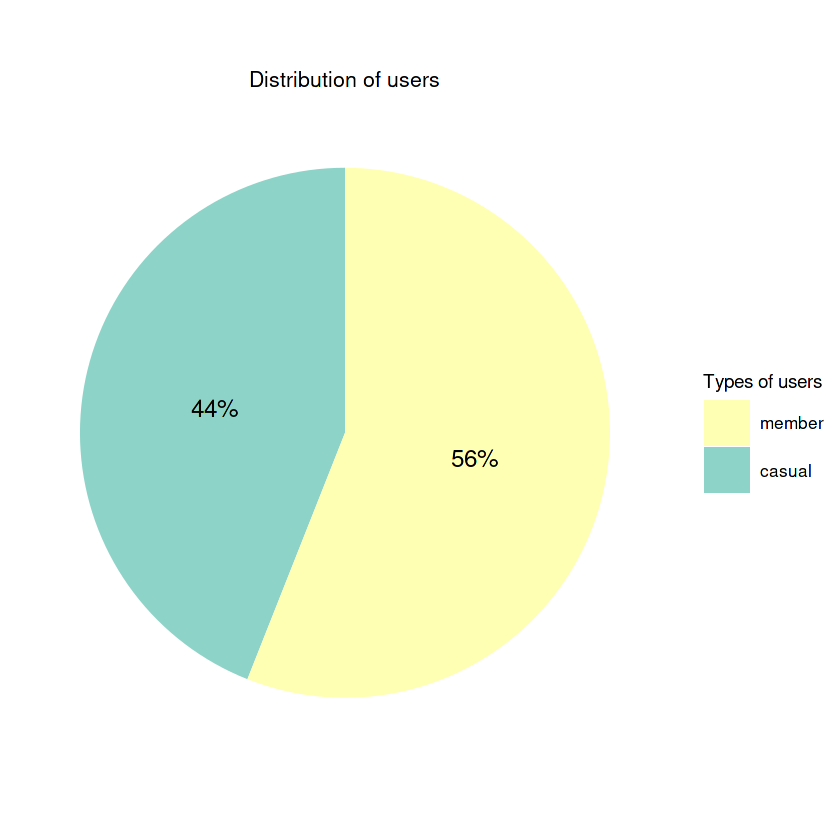

In [53]:
tripdata %>%
  group_by(member_casual) %>%
  summarise(quantidade = n_distinct(ride_id)) %>%
  mutate(porcentagem = quantidade/sum(quantidade)) %>%
  arrange(porcentagem) %>% 
  ggplot(mapping = aes(x = "", y = porcentagem, fill = member_casual),
         stat = 'identity', color = 'white') +
  geom_col() +
  coord_polar('y', start = 0) + 
  theme_bw() +
  ggtitle('Distribution of users') + ##add title
  theme(plot.title = element_text(hjust = 0.5, size = 12.5),## format title
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(), 
        panel.border = element_blank(),
        legend.text = element_text(size = 10),
        legend.title = element_text(hjust = 0.5, size = 11),
        legend.key.size = unit(1,"cm")) +
  guides(fill = guide_legend(reverse = TRUE)) +
  scale_fill_brewer(palette = "Set3", 
                    name = "Types of users")+
  geom_text(aes(x = "", y =(1 - (cumsum(porcentagem) - 0.5*porcentagem)), label = paste0(round(porcentagem, 2)*100, "%")),
            size = 5)

Since 45% is casual, is interesting invest in this category in order to improve company revenue.

## Users vs Bike Types

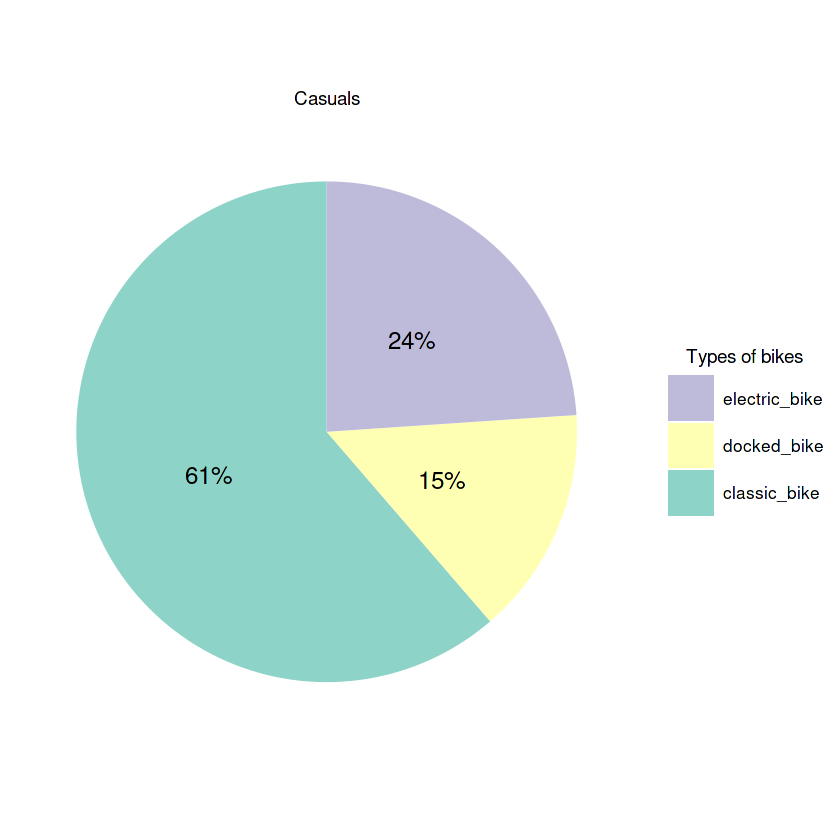

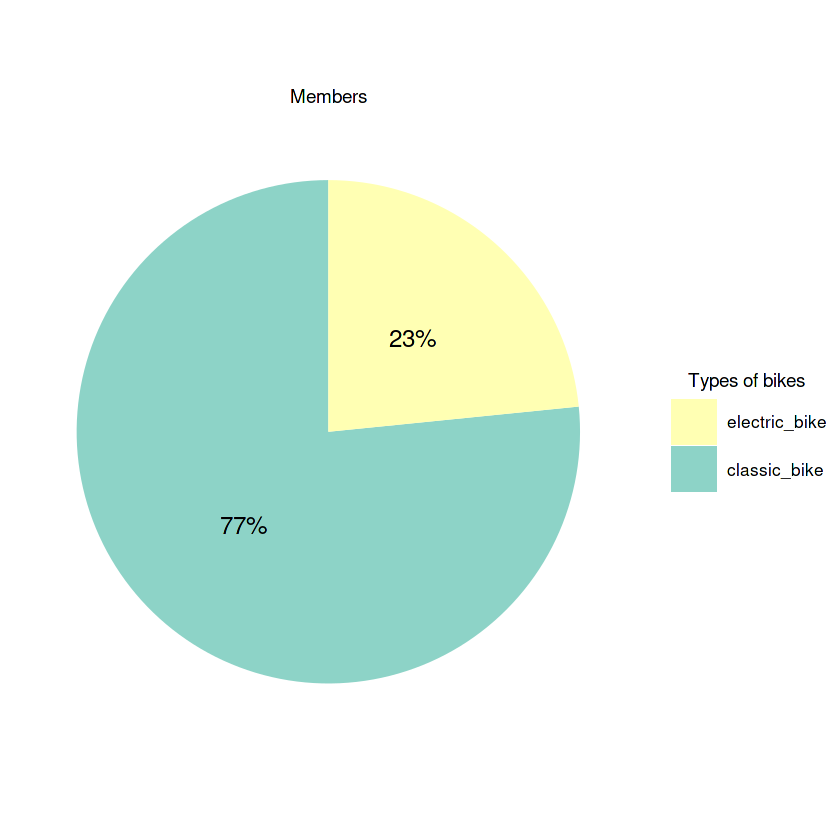

In [54]:
tripdata %>% 
  group_by(rideable_type) %>%
  filter(member_casual == "casual") %>% 
  summarise(quantidade = n_distinct(ride_id)) %>%
  mutate(porcentagem = quantidade/sum(quantidade)) %>% 
  ggplot(mapping = aes(x = "", y = porcentagem, fill = rideable_type),
         stat = 'identity', color = 'white') +
  geom_col() +
  coord_polar('y', start = 0) + 
  theme_bw() +
  ggtitle('Casuals') + ##add title
  theme(plot.title = element_text(hjust = 0.5, size = 11),## format title
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(), 
        panel.border = element_blank(),
        legend.text = element_text(size = 10),
        legend.title = element_text(hjust = 0.5, size = 11),
        legend.key.size = unit(1,"cm")) +
  guides(fill = guide_legend(reverse = TRUE)) +
  scale_fill_brewer(palette = "Set3", 
                    name = "Types of bikes")+
  geom_text(aes(x = "", y =(1 - (cumsum(porcentagem) - 0.5*porcentagem)), label = paste0(round(porcentagem, 2)*100, "%")),
            size = 5)


tripdata %>% 
  group_by(rideable_type) %>%
  filter(member_casual == "member") %>%
  summarise(quantidade = n_distinct(ride_id)) %>%
  mutate(porcentagem = quantidade/sum(quantidade)) %>% 
  ggplot(mapping = aes(x = "", y = porcentagem, fill = rideable_type),
         stat = 'identity', color = 'white') +
  geom_col() +
  coord_polar('y', start = 0) + 
  theme_bw() +
  ggtitle('Members') + ##add title
  theme(plot.title = element_text(hjust = 0.5, size = 11),## format title
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(), 
        panel.border = element_blank(),
        legend.text = element_text(size = 10),
        legend.title = element_text(hjust = 0.5, size = 11),
        legend.key.size = unit(1,"cm")) +
  guides(fill = guide_legend(reverse = TRUE)) +
  scale_fill_brewer(palette = "Set3", 
                    name = "Types of bikes")+
  geom_text(aes(x = "", y =(1 - (cumsum(porcentagem) - 0.5*porcentagem)), label = paste0(round(porcentagem, 2)*100, "%")),
            size = 5) 

This chart makes evidence that a difference between casual and members is the usage of docked bikes.

## Rides vs Time

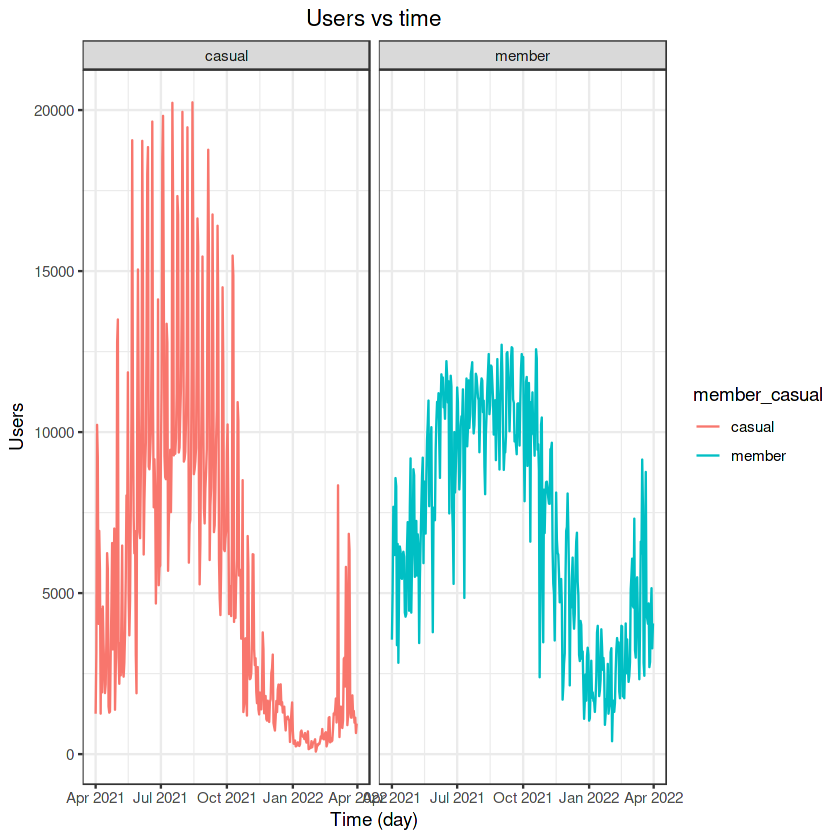

In [55]:
pivot_table <- tripdata %>%
  group_by(ride_day, member_casual) %>% 
  tally()


ggplot(data = pivot_table, mapping = aes(x = ride_day, y = n, color = member_casual,
                                           stat = 'identity')) +
  geom_line() +
  facet_grid(~member_casual) +
  ggtitle("Users vs time") +
  labs(x = "Time (day)", y = "Users") +
  theme_bw() +
  scale_fill_brewer(palette = "Set3",
                    name = "Types of users") +
  theme(plot.title = element_text(hjust = 0.5))

Both members and casuals saw an increase in users during July and August followed by a sharp drop in the following months and a big increase in march and april. The influence of covid and more transmissible variants probaly correlates with this rises and falss. Also, climatic factors,such as winter influences.   

In [56]:
heatmap_pivot<- tripdata %>% 
  group_by(ride_weekday, ride_hour, member_casual) %>%
  tally()

## Rides vs Weekdays

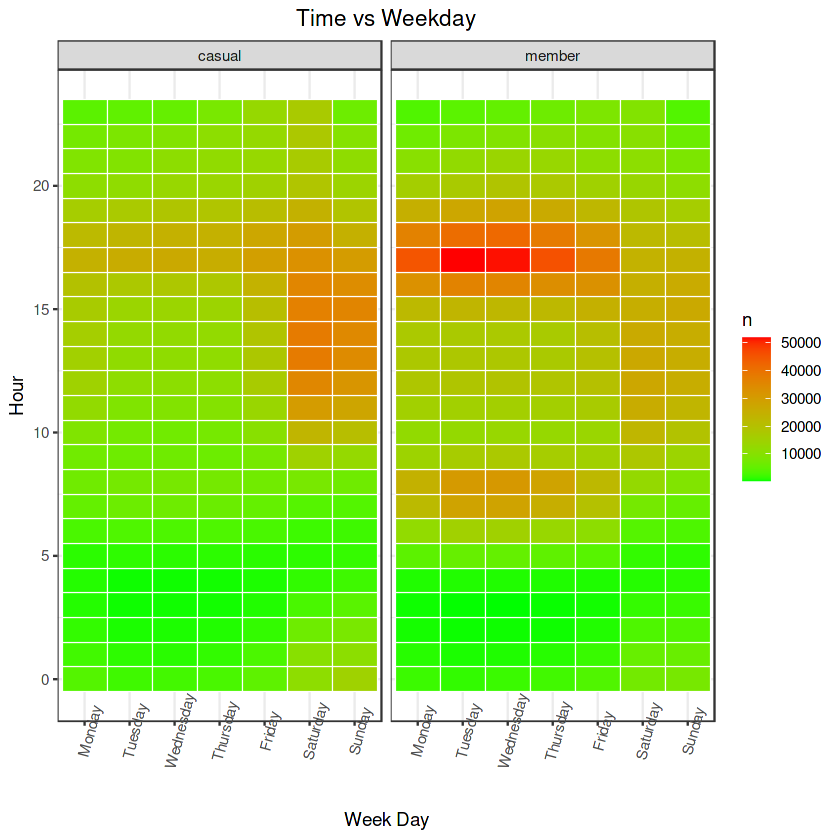

In [57]:
ggplot(heatmap_pivot,aes(x = ride_weekday, y = ride_hour, fill = n)) + 
  facet_wrap(~member_casual) +
  theme_bw() +
  geom_tile(colour = "white", size = 0.25) +
  scale_fill_gradient(low = "green", high = "red") +
  labs(title = "Time vs Weekday", x = "Week Day", y = "Hour") + 
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 75))

Members use bicycles more during weekdays from 4pm to 7pm, suggesting return from work.
Between 7am to 8am, has also a high usage which coincides with the start of work for most people.
On weekends, casuals and members use the bikes in similar periods from 9 am to 3 pm, suggesting more leisure porpose.

## Rides vs Month

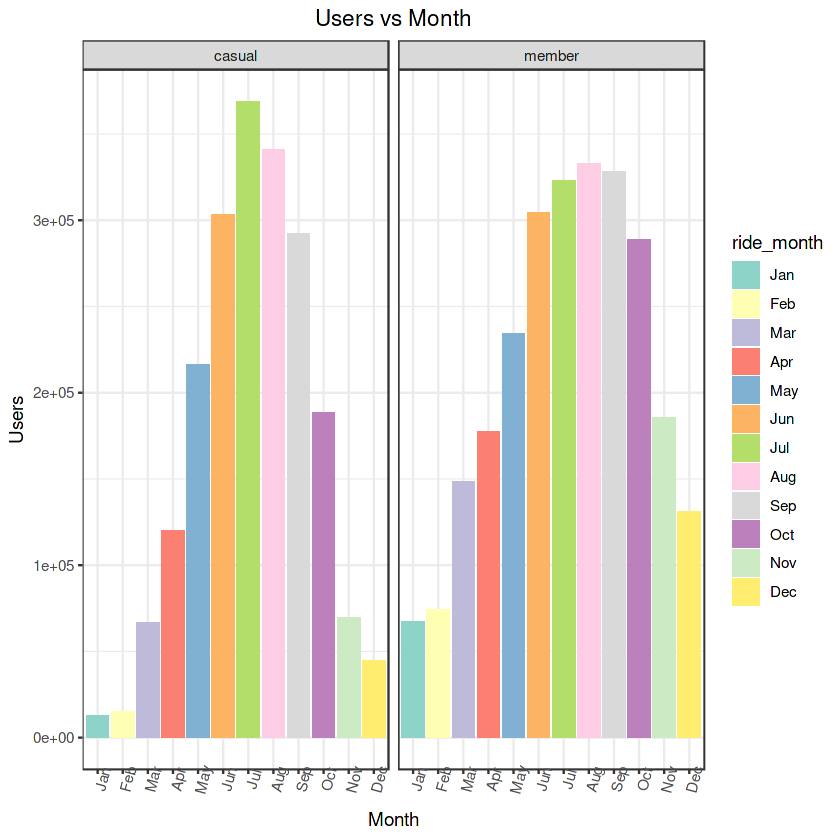

In [58]:
tripdata %>% 
  ggplot(mapping = aes(x = ride_month, fill = ride_month)) +
  geom_bar() +
  scale_fill_brewer(palette = "Set3") +
  theme_bw() +
  facet_wrap(~member_casual) +
  labs(title = "Users vs Month", y = "Users", x = "Month") +
  theme(axis.text.x = element_text(angle = 75),
        plot.title = element_text(hjust = .5))

The curve of how many trips are made per month shows us that most trips happen in spring, summer and autumn. however, members use it more during the colder months.

## Proportional Circle Map: Stations vs Rides

To see if has any difference between sart sations and and staions both categories will remain separated, and filtered to only have coordinates, type of user and station name.

In [59]:
stations <- tripdata %>% 
  select(member_casual, start_lat, start_lng, end_lat, end_lng, start_station_name, end_station_name)


start_stations <- stations %>% 
  group_by(start_station_name, member_casual) %>% 
  summarize(mean_lat = mean(start_lat),
            mean_lng = mean(start_lng),
            n = n())
head(start_stations)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
2112 W Peterson Ave,casual,41.99117,-87.68359,331
2112 W Peterson Ave,member,41.99118,-87.68359,506
63rd St Beach,casual,41.78095,-87.57626,1366
63rd St Beach,member,41.78095,-87.57626,557
900 W Harrison St,casual,41.87475,-87.64981,2597
900 W Harrison St,member,41.87475,-87.64981,6212


In [60]:
end_stations <- stations %>% 
  group_by(end_station_name, member_casual) %>% 
  summarize(mean_lat = mean(start_lat),
            mean_lng = mean(start_lng),
            n = n())
head(end_stations)

`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


end_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
2112 W Peterson Ave,casual,41.97617,-87.66883,397
2112 W Peterson Ave,member,41.98693,-87.67310,588
63rd St Beach,casual,41.79593,-87.58667,1460
63rd St Beach,member,41.80962,-87.59434,561
900 W Harrison St,casual,41.87685,-87.64743,2562
900 W Harrison St,member,41.87472,-87.64960,6297


Next chunk has porpose to determine a frame to ggmap.

In [61]:
tripdata %>% 
  summarise(lat_max = max(start_lat),
            lat_min = min(start_lat),
            lng_max = max(start_lng),
            lng_min = min(start_lng),
            mean_start_lat = mean(start_lat),
            mean_start_lng = mean(start_lng),
            mean_end_lat = mean(end_lat),
            mean_end_lng = mean(end_lng)
  )

lat_max,lat_min,lng_max,lng_min,mean_start_lat,mean_start_lng,mean_end_lat,mean_end_lng
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45.63503,41.6485,-73.79648,-87.83,41.90276,-87.64354,41.90304,-87.64378


Mean and min longite are close to each other, however, max ongitude is realy far. The difference between bouth is 14°, wich represents, according to <https://www.usna.edu/Users/oceano/pguth/md_help/html/approx_equivalents.htm> equals to 14*111= 1554 km. Definitely a outlier. 

Standard deviation calculation

In [62]:
mean_start = mean(tripdata$start_lng)
mean_end = mean(tripdata$end_lng)
sd_start = sd(tripdata$start_lng)
sd_end = sd(tripdata$end_lng)

Eliminate outliers 3 standard deviations away from the mean

In [63]:
tripdata_v2 <- tripdata %>% 
    filter((start_lng > (mean_start - 3 * sd_start)) & (start_lng < (mean_start + 3 * sd_start)))

tripdata_v2 <- tripdata %>% 
    filter((end_lng > (mean_end - 3 * sd_end)) & (end_lng < (mean_end + 3 * sd_end)))

stations_v2 <- tripdata_v2 %>% 
  select(member_casual, start_lat, start_lng, end_lat, end_lng, start_station_name, end_station_name)


Reproduce procedure with tripdata_v2

In [64]:
start_stations_v2 <- stations_v2 %>% 
  group_by(start_station_name, member_casual) %>% 
  summarize(mean_lat = mean(start_lat),
            mean_lng = mean(start_lng),
            n = n())
head(start_stations_v2)

end_stations_v2 <- stations_v2 %>% 
  group_by(end_station_name, member_casual) %>% 
  summarize(mean_lat = mean(start_lat),
            mean_lng = mean(start_lng),
            n = n())
head(end_stations_v2)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
2112 W Peterson Ave,casual,41.99117,-87.68359,331
2112 W Peterson Ave,member,41.99118,-87.68359,502
63rd St Beach,casual,41.78095,-87.57626,1303
63rd St Beach,member,41.78096,-87.57625,481
900 W Harrison St,casual,41.87475,-87.64981,2591
900 W Harrison St,member,41.87475,-87.64981,6205


`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


end_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
2112 W Peterson Ave,casual,41.97617,-87.66883,397
2112 W Peterson Ave,member,41.98693,-87.67310,588
63rd St Beach,casual,41.79593,-87.58667,1460
63rd St Beach,member,41.80969,-87.59439,560
900 W Harrison St,casual,41.87685,-87.64743,2562
900 W Harrison St,member,41.87472,-87.64960,6297


In [65]:
tripdata %>% 
  summarise(lat_max = max(start_lat),
            lat_min = min(start_lat),
            lng_max = max(start_lng),
            lng_min = min(start_lng),
            mean_start_lat = mean(start_lat),
            mean_start_lng = mean(start_lng),
            mean_end_lat = mean(end_lat),
            mean_end_lng = mean(end_lng)
  )

lat_max,lat_min,lng_max,lng_min,mean_start_lat,mean_start_lng,mean_end_lat,mean_end_lng
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45.63503,41.6485,-73.79648,-87.83,41.90276,-87.64354,41.90304,-87.64378


Outlier is gone!

To plot a map more packages are needed.

In [66]:
install.packages("openintro",repos = "http://cran.us.r-project.org")
install.packages("maps",repos = "http://cran.us.r-project.org")
install.packages("ggmap",repos = "http://cran.us.r-project.org")
install.packages("ggthemes",repos = "http://cran.us.r-project.org")

library("openintro")
library("maps")
library('ggmap')
library('ggthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 1 rows containing missing values (geom_point).”


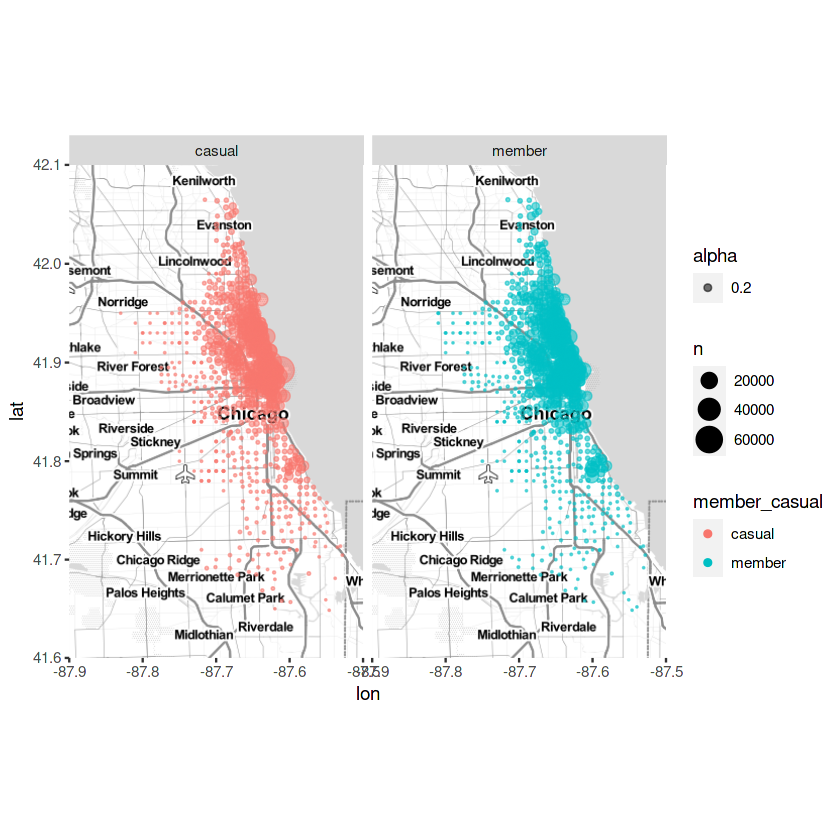

In [67]:
chicago <- get_stamenmap(
  bbox = c(left = -87.9, right = -87.50, bottom = 41.6, top = 42.1),
  maptype = "toner-lite",
  zoom = 10)

ggmap(chicago) +
  geom_point(data = start_stations_v2,
             aes(x = mean_lng, y = mean_lat, size = n, color = member_casual, alpha = 0.2) ) +
  scale_size_area(max_size = 7) +
  facet_grid(~member_casual)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


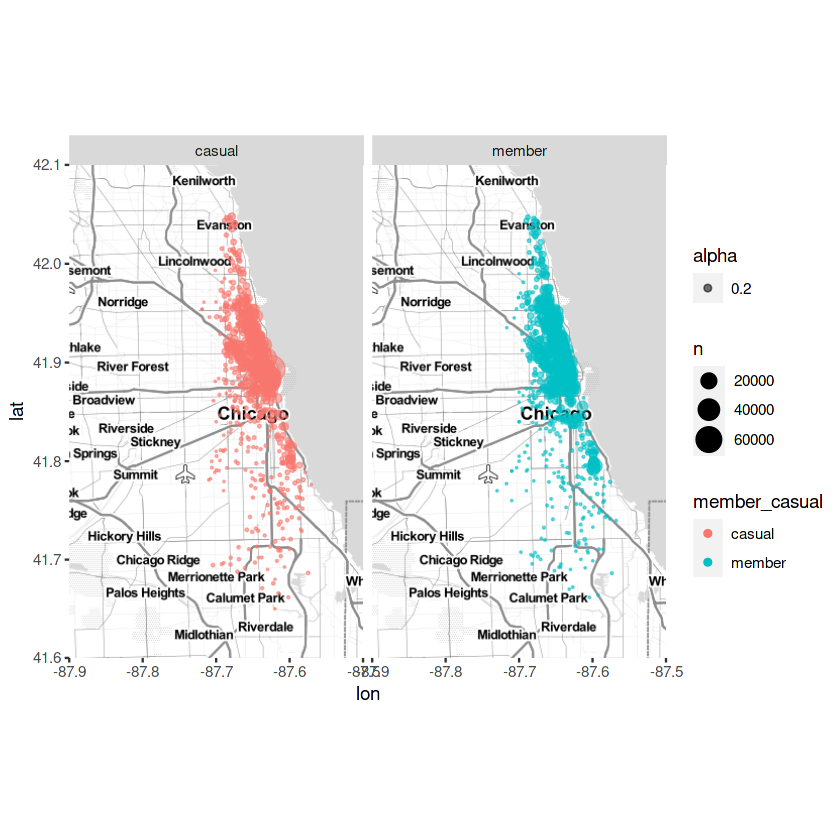

In [68]:
ggmap(chicago) +
  geom_point(data = end_stations_v2,
             aes(x = mean_lng, y = mean_lat, size = n, color = member_casual, alpha = 0.2) ) +
  scale_size_area(max_size = 7) +
  facet_grid(~member_casual)

Bouth casuals and members seems to share same spots in the city in bouth cases (start station and end station)

To get a better view of how each station is attended, only 10 busiest states will be filtered.
It is first necessary to organize the data.

In [69]:
start_stations_v2 <- start_stations_v2[order(-start_stations_v2$n), ]
end_stations_v2 <- end_stations_v2[order(-end_stations_v2$n), ]

head(start_stations_v2)
head(end_stations_v2)

start_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
Streeter Dr & Grand Ave,casual,41.89227,-87.61205,65243
Millennium Park,casual,41.88105,-87.62408,31739
Michigan Ave & Oak St,casual,41.90097,-87.62377,28479
Kingsbury St & Kinzie St,member,41.88918,-87.63850,24164
Clark St & Elm St,member,41.90293,-87.63136,23994
Wells St & Concord Ln,member,41.91211,-87.63470,23078


end_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
Streeter Dr & Grand Ave,casual,41.89350,-87.62469,68382
Millennium Park,casual,41.88409,-87.62521,33353
Michigan Ave & Oak St,casual,41.90475,-87.63056,30115
Kingsbury St & Kinzie St,member,41.89386,-87.64070,24175
Clark St & Elm St,member,41.90204,-87.63701,23977
Wells St & Concord Ln,member,41.90985,-87.64048,23684


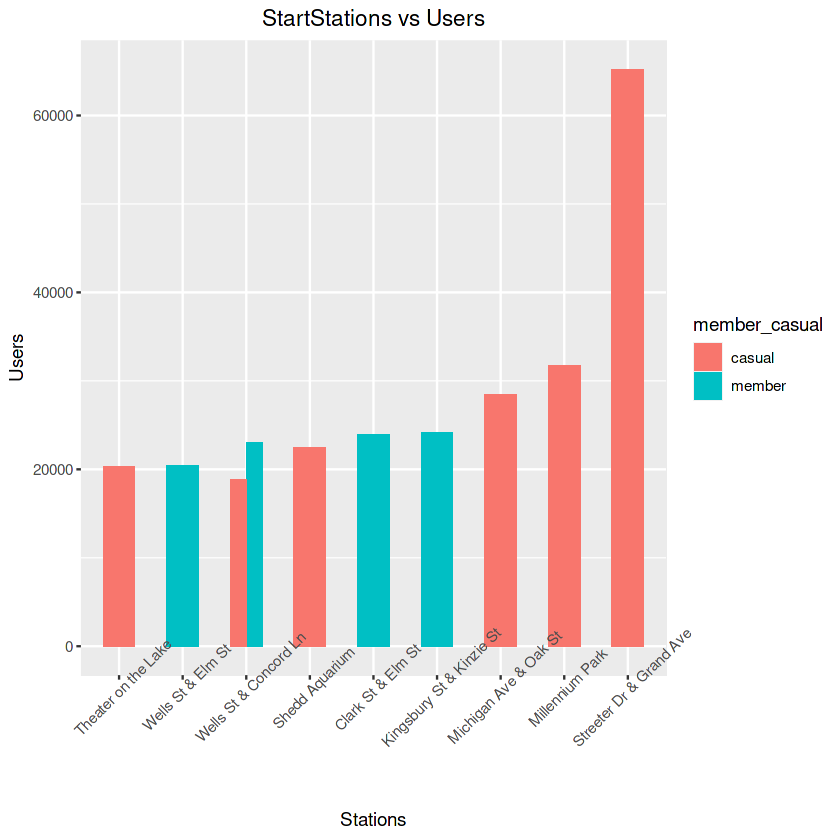

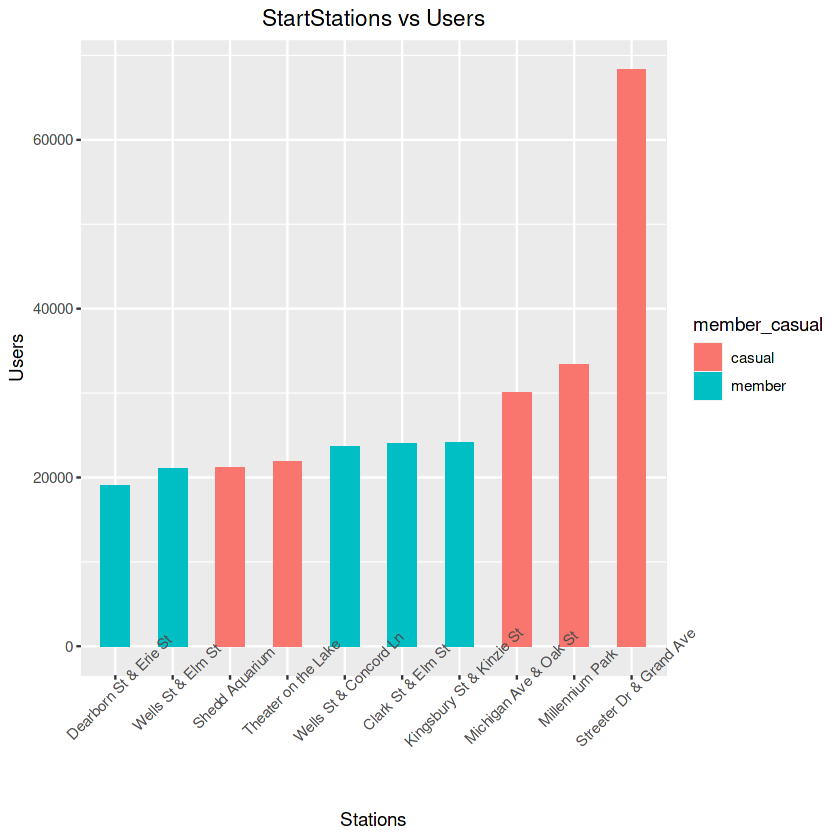

In [70]:
ggplot(start_stations_v2[0:10, ], aes(x = reorder(start_station_name, n), y = n, fill = member_casual)) +
  geom_col(position = position_dodge(0.5),
          width = 0.5) +
  labs(title = "StartStations vs Users", y = "Users", x = "Stations") +
  theme(axis.text.x = element_text(angle = 45),
        plot.title = element_text(hjust = .5))
  
  
  ggplot(end_stations_v2[0:10, ], aes(x = reorder(end_station_name, n), y = n, fill = member_casual)) +
  geom_col(position = position_dodge(0.5),
          width = 0.5) +
  labs(title = "StartStations vs Users", y = "Users", x = "Stations") +
  theme(axis.text.x = element_text(angle = 45),
        plot.title = element_text(hjust = .5))

Seemms that casual users and anual members uses different stations. knowing where have more casual, the marketing will probably be more effective.

In [71]:
target_audience <- start_stations_v2 %>% 
    filter(member_casual == "casual")

head(target_audience, 10)

start_station_name,member_casual,mean_lat,mean_lng,n
<chr>,<chr>,<dbl>,<dbl>,<int>
Streeter Dr & Grand Ave,casual,41.89227,-87.61205,65243
Millennium Park,casual,41.88105,-87.62408,31739
Michigan Ave & Oak St,casual,41.90097,-87.62377,28479
Shedd Aquarium,casual,41.86723,-87.61536,22420
Theater on the Lake,casual,41.92627,-87.63086,20322
Wells St & Concord Ln,casual,41.91211,-87.63470,18832
DuSable Lake Shore Dr & Monroe St,casual,41.88097,-87.61675,17255
Lake Shore Dr & Monroe St,casual,41.88097,-87.61674,16859
Clark St & Lincoln Ave,casual,41.91570,-87.63461,16137


In [72]:
summarie <- tripdata %>% 
  group_by(member_casual) %>% 
  summarise(mean =mean(ride_length_min),
            median =median(ride_length_min),
            max = max(ride_length_min),
            min = min(ride_length_min))
  
head(summarie)

member_casual,mean,median,max,min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,26.57348,16.42,564.82,0.02
member,12.79190,9.50,564.30,0.02


In [73]:
##average ride time by each day members users

summarie_weekday_member <- tripdata %>% 
  filter(member_casual == 'member') %>%
  group_by(ride_weekday) %>% 
  summarise(ride_mean =mean(ride_length_min),
            ride_median =median(ride_length_min),
            ride_max = max(ride_length_min),
            ride_min = min(ride_length_min),
            type = 'member') 

##average ride time by each day casual users

summarie_weekday_casual <- tripdata %>% 
  filter(member_casual == 'casual') %>%
  group_by(ride_weekday) %>% 
  summarise(ride_mean =mean(ride_length_min),
            ride_median =median(ride_length_min),
            ride_max = max(ride_length_min),
            ride_min = min(ride_length_min),
            type = 'casual')

summarie_weekday <- merge(summarie_weekday_casual, summarie_weekday_member, all=TRUE)

head(summarie_weekday,14)

,ride_weekday,ride_mean,ride_median,ride_max,ride_min,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Monday,12.37235,9.10,561.88,0.02,member
2,Monday,27.06792,16.48,564.82,0.02,casual
3,Tuesday,11.97785,8.98,560.90,0.02,member
4,Tuesday,23.85156,14.42,564.15,0.02,casual
5,Wednesday,12.12178,9.15,553.80,0.02,member
6,Wednesday,23.16712,14.30,564.48,0.02,casual
7,Thursday,12.00489,9.03,564.13,0.02,member
8,Thursday,22.70726,14.02,564.47,0.02,casual
9,Friday,12.49278,9.37,543.45,0.02,member


## Ride Length vs Weekday

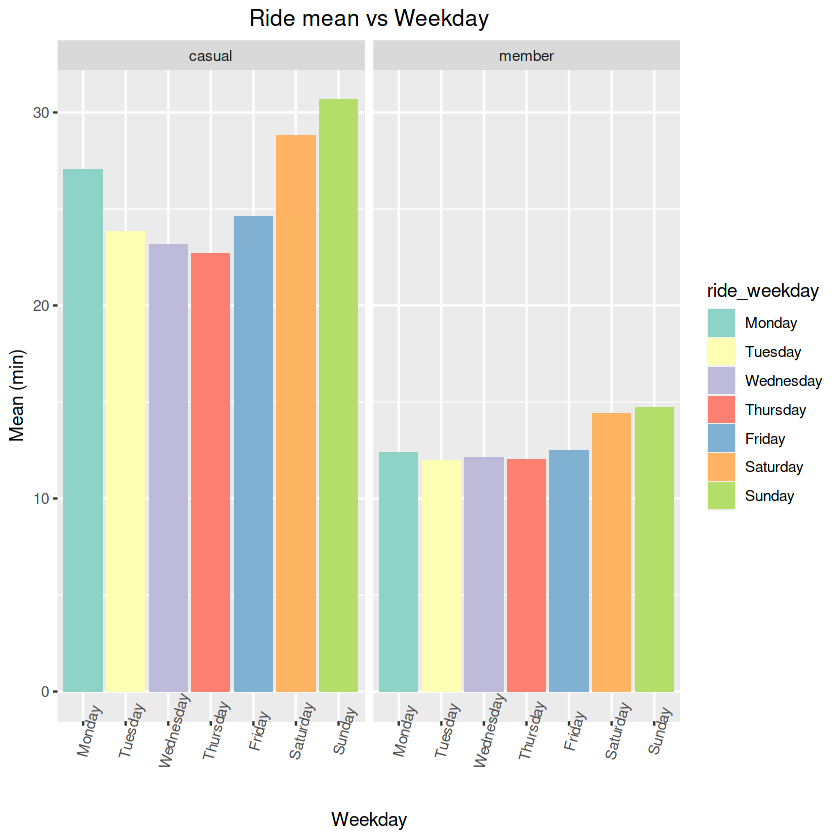

In [74]:
ggplot(data = summarie_weekday, mapping = aes( x = ride_weekday, fill = ride_weekday)) +
  geom_col(aes(y = ride_mean)) +
  facet_grid(~type) +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Ride mean vs Weekday", x = "Weekday", y = "Mean (min)") +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 75))